In [1]:
import ase
import numpy as np
from ase.visualize import view
import struct_statistics as stats
import matplotlib.pyplot as p
import soaputils as su
%matplotlib qt5
p.ion()

0
1
2
3
4
5
6
7
8
9
[[13.26  0.    0.  ]
 [ 0.   13.26  0.  ]
 [ 0.    0.   13.26]]


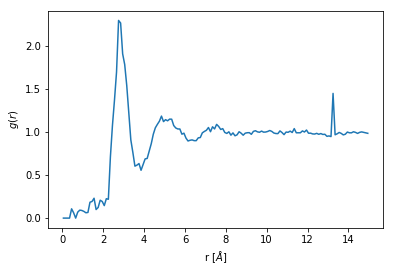

In [2]:
# average PDF/RDF of dump file structs with single species
N = 10
Nbins = 150
hists = np.zeros((N,Nbins))
struct_dump = ase.io.read("res_structs/dump_50A.cfg")
nums = struct_dump.get_atomic_numbers()
nums = [1 for i in nums]
struct_dump.set_atomic_numbers(nums)

for i in np.arange(N):
    print(i)
    struct = su.ran_sample(struct_dump,(13.26,13.26,13.26),seed=50+i)
    struct.set_pbc((1,1,1))
    hist, distBins = stats.simpleRDF(struct, numBins=Nbins, rCut=15)
    hists[i,:] = hist
    #hists[i,:] = hist[:]
meanHist = np.mean(hists,0)
p.plot(distBins,meanHist)
#p.xlabel("Distance in A")
#p.legend(h,['Zr-Zr','Zr-Cu','Cu-Cu'])
p.xlabel('r [$\AA$]')
p.ylabel('$g(r)$')
print(struct.get_cell())

Text(0, 0.5, '$g(r)$')

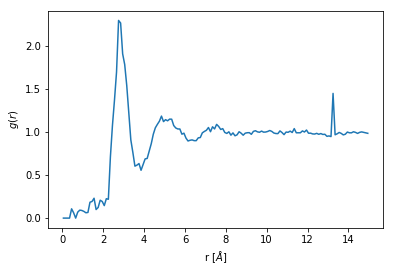

In [3]:
p.plot(distBins,meanHist)
p.xlabel('r [$\AA$]')
p.ylabel('$g(r)$')

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, '$g(r)$')

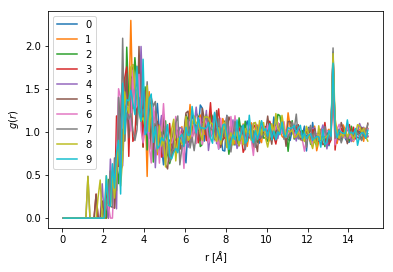

In [4]:
# average PDF/RDF of batch of optimisations
for i in np.arange(N):
    print(i)
    filename = "batch" + str(i) + ".cfg"
    struct = ase.io.read("res_structs/x0_test/" + filename)
    struct.set_pbc((1,1,1))
    hist, distBins2 = stats.simpleRDF(struct, numBins=Nbins, rCut=15)
    hist[0] = 0 # batch6 has a problem with the zeroth bin
    hists[i,:] = hist
    p.plot(distBins2,hist, label=str(i))
    #hists[i,:] = hist[:]
p.legend()
meanHist2 = np.mean(hists,0)
p.xlabel('r [$\AA$]')
p.ylabel('$g(r)$')

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, '$g(r)$')

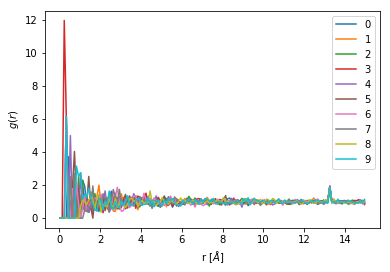

In [5]:
# average PDF/RDF of random structures
for i in np.arange(N):
    print(i)
    struct = su.gen_struct(70, seed = 50+i)
    struct.set_pbc((1,1,1))
    hist, distBins3 = stats.simpleRDF(struct, numBins=Nbins, rCut=15)
    hist[0] = 0 # batch6 has a problem with the zeroth bin
    hists[i,:] = hist
    p.plot(distBins2,hist, label=str(i))
    #hists[i,:] = hist[:]
p.legend()
meanHist3 = np.mean(hists,0)
p.xlabel('r [$\AA$]')
p.ylabel('$g(r)$')

Text(0, 0.5, '$g(r)$')

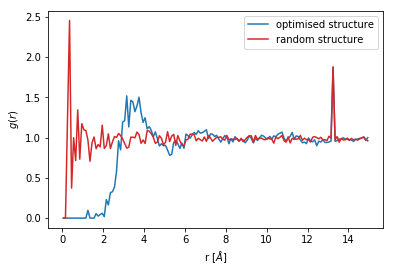

In [6]:
# plot RDF of optimised structure and random structure together
p.plot(distBins,meanHist2,'C0', label='optimised structure')
p.plot(distBins,meanHist3,'C3', label='random structure')

p.legend()
p.xlabel('r [$\AA$]')
p.ylabel('$g(r)$')

Text(0, 0.5, '$g(r)$')

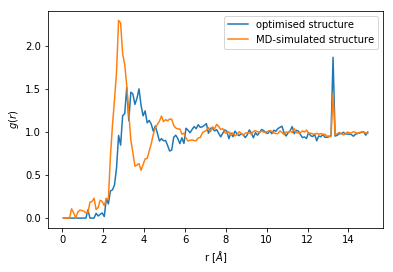

In [7]:
# plot RDF of optimised structure and dump file structure together
p.plot(distBins,meanHist2,'C0', label='optimised structure')
p.plot(distBins,meanHist,'C1', label='MD-simulated structure')

p.legend()
p.xlabel('r [$\AA$]')
p.ylabel('$g(r)$')